In [1]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

In [3]:
import pandas as pd
import openpyxl as openpyxl
import random 
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

C:\Users\josep\AppData\Local\Temp\ipykernel_48660\483207878.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import os
os.getcwd()

'c:\\Users\\josep\\OneDrive - Aarhus universitet\\Speciale\\Speciale---Stibo'

In [4]:
#file_path = r"C:\Users\uffeb\OneDrive - Aarhus universitet\Kandidat\Master\Speciale\Speciale---Stibo\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv"
file_path = r"C:\Users\josep\OneDrive - Aarhus universitet\Speciale\Speciale---Stibo\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [9]:
pip install ucimlrepo 

In [10]:
## Loading the ADULT dateset from UCI repo 
#Avaliable at https://archive.ics.uci.edu/dataset/2/adult
import ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features # Importing all features 
y = adult.data.targets # Importing target varialbes

In [11]:
y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})


C:\Users\josep\AppData\Local\Temp\ipykernel_48660\1846786675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})


In [12]:
y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

In [13]:
data =  pd.concat([X, y], axis=1)

In [15]:
# Checking the data types of all the columns
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [16]:
## Converting the Predictor Variable into Numeric 
data['income']=data['income'].map({'<=50K':0,'>50K':1})
data['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [17]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
data=pd.get_dummies(data, drop_first = True)

In [33]:
from sklearn.model_selection import train_test_split

y = data['income'].values
features = [col for col in data.columns if col not in ['income']]
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'max_depth': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10],
    'min_samples_split': [5],
    'n_estimators': [10]
    }

# Initialize the RandomForestClassifier (you can choose any other classifier)
classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
n_estimators = 100
grid_search_rf = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)


# Use the best model for predictions
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

Best Hyperparameters: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 10}


In [34]:
import eli5
from eli5.sklearn import PermutationImportance

imp = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(imp, feature_names = X_test.columns.tolist())

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\metaestimators.py)

In [35]:
y_pred_rf[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
X_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
37580,33,66278,14,0,0,45,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
12928,27,298510,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48275,42,119941,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
37346,37,207066,14,0,0,70,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
10185,48,164582,10,7298,0,60,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Model explainability - Local and Global interpretations

In [28]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [30]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
best_model_rf

RandomForestClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=10, random_state=0)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


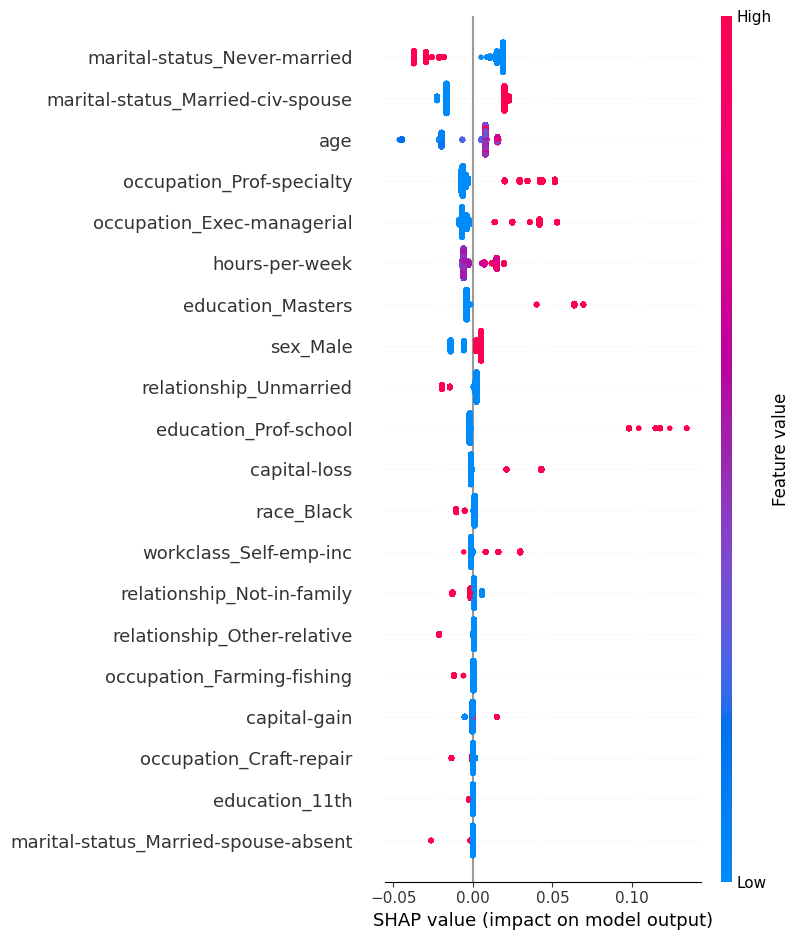

In [32]:
import shap
import matplotlib.pyplot as plt

# Create an explainer for the best model
explainer_rf = shap.Explainer(best_model_rf)

#X_test_col = X_test.columns

# Calculate SHAP values for a single prediction (change the index as needed)
#shap_values_rf = explainer_rf(X_test.iloc[1])

# Calculate SHAP values for a set of predictions
shap_values_rf = explainer_rf(X_test)

# Create an output for Churn = 1, for all X observations in the test set
shap.summary_plot(shap_values_rf[:, :, 1], X_test)

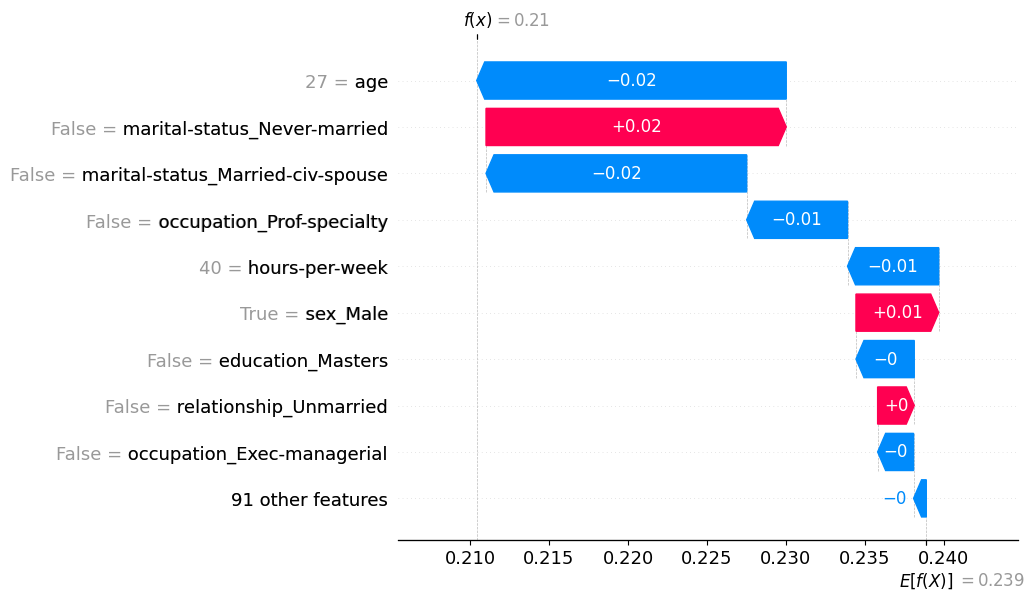

In [36]:
# Viser fordelingen af variabler for prediction i række 1, fra perspektivet churn = 0 (begge inputs kan ændres)
shap.plots.waterfall(shap_values_rf[1, :, 1])

In [37]:
shap_values_rf[:, :, 1].shape

(14653, 100)

In [39]:
# Showing a dataframe of each - 0.26 is the base value for churn = 1, for all observations. Each variable then has a SHAP-value +- the BV
shap_df = pd.DataFrame(
    np.c_[shap_values_rf[:, :, 1].base_values, shap_values_rf[:, :, 1].values],
    columns = ["Income"] + list(X_test.columns)
)

In [40]:
shap_df

,Income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.238881,0.007939,0.0,0.0,-0.000088,-0.001173,0.007268,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.238881,-0.019594,0.0,0.0,-0.000088,-0.001173,-0.005774,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.238881,0.015527,0.0,0.0,-0.000088,-0.001173,-0.005774,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.238881,0.007939,0.0,0.0,-0.000088,-0.001173,0.007268,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.238881,0.007939,0.0,0.0,0.000260,-0.001173,0.015029,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14648,0.238881,-0.019594,0.0,0.0,-0.000088,-0.001173,0.015029,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14649,0.238881,-0.019594,0.0,0.0,-0.000088,-0.001173,-0.005774,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14650,0.238881,0.007939,0.0,0.0,-0.000088,-0.001173,0.007268,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14651,0.238881,-0.019594,0.0,0.0,-0.000088,-0.001173,-0.005774,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
shap_df.to_csv('shap.csv', index=False)  # Set index=False to not write row numbers as the first column

## Next steps
1. lav agg average calc
2. afprøv flere viz
3. kan vi allerede nu lave LLM ovenpå disse SHAP værdier?